# Challenge 1 : Bounding Box

A boundingBox is a rectangle (box) representing an object on an image:

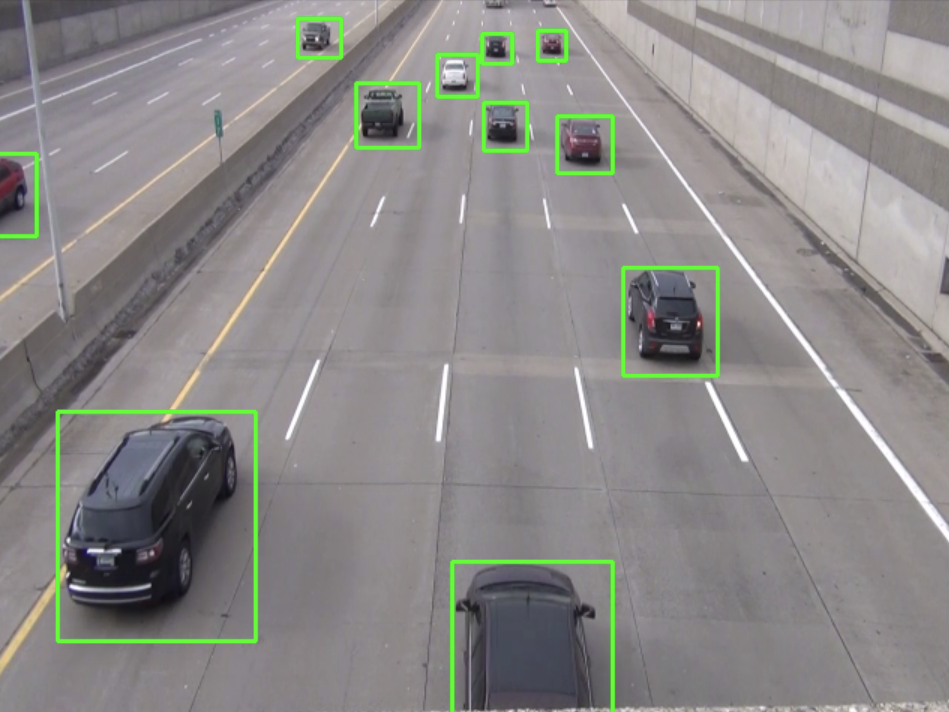

The coordinates of each box are always represented by 4 numbers, these numbers can indicate several things depending on the format of the bouding box. They can be represented by :

- x top left, y top left, width, height
- x top left, y top left, x bottom right, y bottom right
- x center, y center, width, height

There are several ways to store our bounding boxes depending on the dataset and models used.

Each uses a different file format and structure. 

The most known are :

### - COCO Format 

COCO stores annotations in a JSON file. Let’s look at the JSON format for storing the annotation details for the bounding box. This will help to create your own data set using the COCO format.

- categories: contains a list of categories. Categories can belong to a supercategory
- images: contains all the image information in the dataset without bounding box or segmentation information. image ids need to be unique
- annotations: list of every individual object annotation from every image in the dataset

Bounding boxes are saved in the format :
```
  (x-top left, y-top left, width, height)
```

### - PascalVOC format

Pascal VOC provides standardized image data sets for object detection

- Pascal VOC is an XML file, unlike COCO which has a JSON file.

- In Pascal VOC we create a file for each of the image in the dataset. In COCO we have one file each, for entire dataset for training, testing and validation.

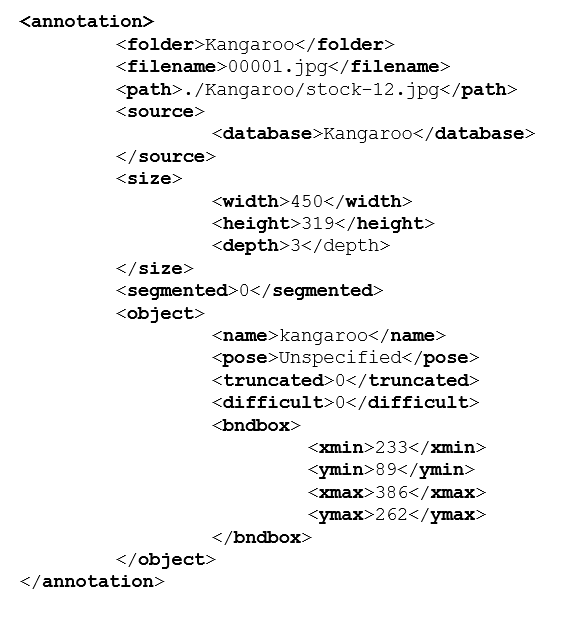

Bounding boxes are saved in the format :
```
  (xmin-top left, ymin-top left,xmax-bottom right, ymax-bottom right)
```

### - YOLO format

Yolo is specific to "YOLO" object detection models

Yolo format create .txt-file for each .jpg-image-file - in the same directory and with the same name, but with .txt-extension, and put to file: object number and object coordinates on this image, for each object in new line:

Bounding boxes are saved in the format :
```
  <object-class> <x_center> <y_center> <width> <height>
```

Where:

- `<object-class>` - integer object number from `0` to `(classes-1)`
- `<x_center> <y_center> <width> <height>` - float values **relative** to width and height of image, it can be equal from `(0.0 to 1.0]`
- for example: `<x> = <absolute_x> / <image_width>` or `<height> = <absolute_height> / <image_height>`
- attention: `<x_center> <y_center>` - are center of rectangle (are not top-left corner)

  For example for `1.jpg` you will be created `1.txt` containing:

  ```csv
  1 0.716797 0.395833 0.216406 0.147222
  0 0.687109 0.379167 0.255469 0.158333
  1 0.420312 0.395833 0.140625 0.166667
  ```

### Exercice 1 - Plot the bounding box on an image

In [1]:
import matplotlib.pyplot as plt

In [3]:
# load image
import os

img = plt.imread('../input/1.jpg')
print(img)
print(f'type(img_type): {type(img)}')

[[[116 103  94]
  [144 131 115]
  [127 114  97]
  ...
  [154 146 135]
  [153 143 131]
  [157 145 131]]

 [[ 98  87  85]
  [ 86  77  70]
  [ 72  63  54]
  ...
  [156 146 136]
  [154 145 130]
  [155 146 131]]

 [[130 118 106]
  [ 97  89  78]
  [ 78  69  60]
  ...
  [157 147 135]
  [153 144 129]
  [155 146 131]]

 ...

 [[106 103  96]
  [108 105  98]
  [109 106  99]
  ...
  [165 156 147]
  [165 156 147]
  [165 156 147]]

 [[107 104  97]
  [105 102  95]
  [105 102  95]
  ...
  [157 148 139]
  [165 156 147]
  [165 156 147]]

 [[103 100  93]
  [104 101  94]
  [ 97  94  87]
  ...
  [157 148 139]
  [148 139 130]
  [151 142 133]]]
type(img_type): <class 'numpy.ndarray'>


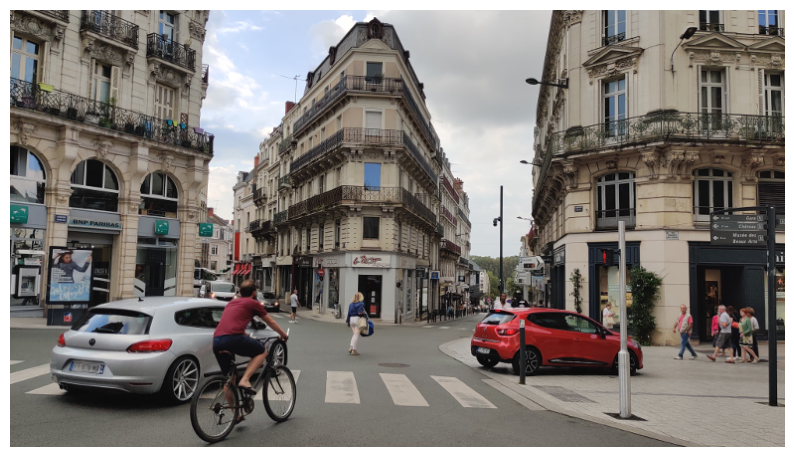

In [4]:
# plot image

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(img)
plt.show()

#### a) From COCO

- Get the image 1.jpg and the coco.json file
- browse the coco.json file, get the boudingboxes and display them on the image

In [62]:
import json
import cv2

In [63]:
# load coco.json file
import json
from pprint import pprint

with open('.json') as json_data:
    boxes = json.loads(json_data)
    json_data.close()
    pprint(boxes)

In [3]:
# load image
img = plt.imread('/content/1.jpg')

In [4]:
# get bouding box and create boxe with cv2.rectanble
for rectangle in boxes["annotations"]:
    (x, y, w, h) = rectangle["bbox"]
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)

In [11]:
# Display the result

#### b) From YOLO

In [6]:
# load yolo.txt file


In [7]:
# load image

In [8]:
# get size of image (width, height)

In [9]:
# get bouding box and create boxe with cv2.rectanble

In [10]:
# Display the result

#### c) From PascalVoc

In [12]:
import xml.etree.ElementTree as ET


def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []

    for boxes in root.iter('object'):

        filename = root.find('filename').text

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filename, list_with_all_boxes

In [101]:
# load xml with read_content : name, boxes = read_content("...voc.xml")

In [109]:
# load image

In [13]:
# get bouding box and create boxe with cv2.rectanble

In [14]:
# Display the result

### Exercice 2 - Cropping bounding boxes on an image

In [113]:
from PIL import Image

In [114]:
img = Image.open('/SSD/exo/data/1.jpg')

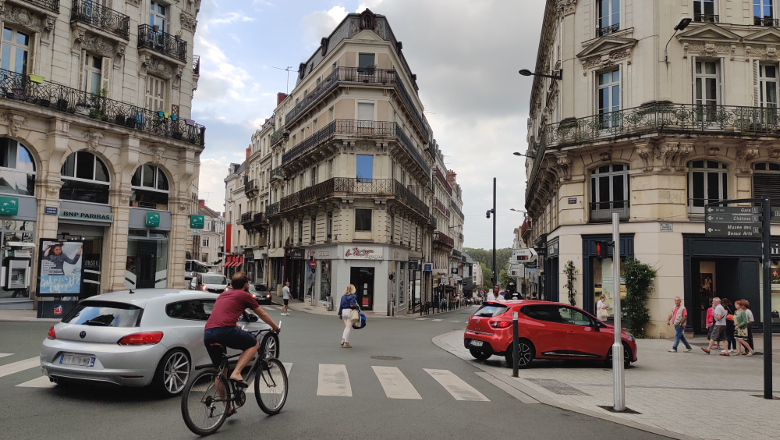

In [115]:
img

In [188]:
# choose a format

In [118]:
# get boudinbox and crop objects

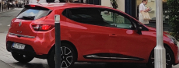

In [122]:
# display crop

### Exercice 3 - Convert formats to YOLO

Yolo being a very used format because they are the most used detection models

In [169]:
def to_yolo(xcenter, ycenter, obj_w, obj_h, img_w, img_h):
    x = xcenter / img_w
    y = ycenter / img_h

    w = obj_w / img_w
    h = obj_h / img_h    

    mystring = str("0 " + str(round(x, 7)) + " " + str(round(y, 7)) + " " + str(round(w, 7)) + " " + str(round(h, 7)))
    
    return mystring

# xcenter = x center of boundingbox
# ycenter = y center of boundingbox

# obj_w, obj_h = size of the boxe
# img_w, img_h = size of the image 1.jpg

In [170]:
# load image
# get size of image (width, height)

#### a) COCO vers Yolo

In [189]:
# Coco stores the bouding boxes in the format : (x-top left, y-top left, width, height)
# Yolo is expecting for a format: <object-class> <x_center> <y_center> <width> <height> with relative values : between 0 and 1

In [175]:
# load coco.json with json

In [178]:
# get coco bounding box from coco and convert it to yolo format using to_yolo

yolo_annotations = []
for annot in coco["annotations"]:
    # code ...
    # get bounding box
    
    # yolo_annot = to_yolo(...)
    
    yolo_annotations.append(yolo_annot)

In [15]:
# display new annotation

#### b) PascalVOC vers Yolo

In [190]:
# PascalVoc stores the bouding boxes in the format : (xmin-top left, ymin-top left,xmax-bottom right, ymax-bottom right)
# Yolo is expecting for a format: <object-class> <x_center> <y_center> <width> <height> with relative values : between 0 and 1

In [183]:
# load voc.xml

In [184]:
# get coco bounding box from pascalvoc and convert it to yolo format using to_yolo

yolo_annotations = []
for annot in boxes:
    # code ...
    # get bounding box
    
    # yolo_annot = to_yolo(...)
    
    yolo_annotations.append(yolo_annot)

In [ ]:
# display new annotation